In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
os.chdir(r"C:\Users\Aniket\Desktop\INTENTION")
x_train=np.load('X_train_ML.npy')
y_train=np.load('Y_train_ML.npy')
x_vel=np.load("X_vel_ML.npy")
y_vel=np.load("Y_vel_ML.npy")
min_m=np.load("min_m_ML.npy")
max_m=np.load("max_m_ML.npy")


In [2]:
shape=x_train.shape
print("input shape:",shape)
Shapey=y_train.shape
print("output shape:",y_train.shape)
print("x_vel.shape",x_vel.shape)
print("y_vel.shape",y_vel.shape)
print("min_m.shape",min_m.shape)
print("max_m.shape",max_m.shape)

input shape: (129040, 500)
output shape: (129040, 75)
x_vel.shape (32261, 100, 5)
y_vel.shape (32261, 15, 5)
min_m.shape (1, 1, 5)
max_m.shape (1, 1, 5)


In [3]:
print("x_vel.shape",x_vel.shape)
x_val_reshaped = x_vel.reshape(-1, 500)
print("x_val_reshaped.shspe:",x_val_reshaped.shape)
y_val_reshaped=y_vel.reshape(-1,75)
print("y_val_reshaped.shspe:",y_val_reshaped.shape)

x_vel.shape (32261, 100, 5)
x_val_reshaped.shspe: (32261, 500)
y_val_reshaped.shspe: (32261, 75)


Epoch 1/100
3226/3226 [==============================] - 8s 2ms/step - loss: 2.9307 - val_loss: 2.5885
Epoch 2/100
3226/3226 [==============================] - 8s 2ms/step - loss: 2.2832 - val_loss: 2.2586
Epoch 3/100
3226/3226 [==============================] - 7s 2ms/step - loss: 2.1291 - val_loss: 2.1094
Epoch 4/100
3226/3226 [==============================] - 6s 2ms/step - loss: 2.0390 - val_loss: 2.0147
Epoch 5/100
3226/3226 [==============================] - 6s 2ms/step - loss: 1.9728 - val_loss: 1.9525
Epoch 6/100
3226/3226 [==============================] - 6s 2ms/step - loss: 1.9149 - val_loss: 1.8975
Epoch 7/100
3226/3226 [==============================] - 7s 2ms/step - loss: 1.8636 - val_loss: 1.8770
Epoch 8/100
3226/3226 [==============================] - 6s 2ms/step - loss: 1.8203 - val_loss: 1.8298
Epoch 9/100
3226/3226 [==============================] - 6s 2ms/step - loss: 1.7843 - val_loss: 1.7830
Epoch 10/100
3226/3226 [==============================] - 6s 2ms/step - l

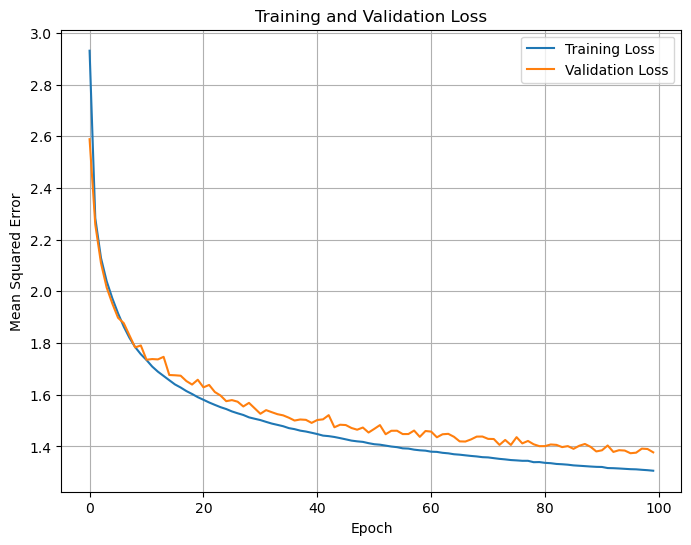

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
num_samples = x_train.shape[0]
time_steps = 5 
num_features = x_train.shape[1] // time_steps 

x_train_3d = np.reshape(x_train, (num_samples, time_steps, num_features))

model = Sequential()
model.add(LSTM(units=64, input_shape=(time_steps, num_features)))
model.add(Dense(units=75)) 
model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(x_train_3d, y_train, epochs=100, batch_size=32, validation_split=0.2)

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
num_test_samples = x_vel.shape[0] 
x_test_3d = np.reshape(x_vel, (num_test_samples, time_steps, num_features))
y_pred = model.predict(x_test_3d)
y_test_2d = np.reshape(y_vel, (num_test_samples, 75))
r2 = r2_score(y_test_2d, y_pred)
mse = mean_squared_error(y_test_2d, y_pred)
mae=mean_absolute_error(y_test_2d, y_pred)
print("R-squared (R2) score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Squared Error (MaE):", mae)


1009/1009 [==============================] - 1s 1ms/step
R-squared (R2) score: 0.7217187308554028
Mean Squared Error (MSE): 1.3673248957333388
Mean Squared Error (MaE): 0.6537825423846423


In [7]:
# Assuming you have already trained the model and stored the training history in 'history'
#training and validation loss for the exoskeleton 
# Get the model's predictions on the training data
y_train_pred = model.predict(x_train_3d)

# Calculate R-squared (R2) score for training data
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for training data
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Mean Absolute Error (MAE) for training data
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)

print("R2 score for training data:", r2_train)
print("Mean Squared Error (MSE) for training data:", mse_train)
print("Mean Absolute Error (MAE) for training data:", mae_train)


4033/4033 [==============================] - 4s 1ms/step
R2 score for training data: 0.7307436347451568
Mean Squared Error (MSE) for training data: 1.3118283629989944
Mean Absolute Error (MAE) for training data: 0.6432228435773181


In [8]:
# Assuming you have already trained the model and stored the training history in 'history'

# Get the model's predictions on the training data
y_train_pred = model.predict(x_train_3d)

# Calculate R-squared (R2) score for training data
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for training data
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Mean Absolute Error (MAE) for training data
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)

print("R2 score for training data:", r2_train)
print("Mean Squared Error (MSE) for training data:", mse_train)
print("Mean Absolute Error (MAE) for training data:", mae_train)

 

4033/4033 [==============================] - 4s 1ms/step
R2 score for training data: 0.7307436347451568
Mean Squared Error (MSE) for training data: 1.3118283629989944
Mean Absolute Error (MAE) for training data: 0.6432228435773181


In [9]:

x_val_3d = np.reshape(x_vel, (x_vel.shape[0], time_steps, num_features))
y_pred = model.predict(x_val_3d)
mse = np.mean((y_pred - y_val_reshaped) ** 2)
std_deviation = np.sqrt(mse)

print("Standard Deviation:", std_deviation)


1009/1009 [==============================] - 1s 1ms/step
Standard Deviation: 1.1693266847777566


In [11]:
def get_time_taken(start_time):
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time

def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 / 1024  # Memory usage in MB

# Training
start_time = time.time()
history = model.fit(x_train_3d, y_train, epochs=100, batch_size=32, validation_split=0.2)
elapsed_time = get_time_taken(start_time)
memory_usage = get_memory_usage()

Epoch 1/100
3226/3226 [==============================] - 8s 3ms/step - loss: 1.2287 - val_loss: 1.3298
Epoch 2/100
3226/3226 [==============================] - 8s 3ms/step - loss: 1.2286 - val_loss: 1.3185
Epoch 3/100
3226/3226 [==============================] - 8s 3ms/step - loss: 1.2278 - val_loss: 1.3260
Epoch 4/100
3226/3226 [==============================] - 8s 3ms/step - loss: 1.2264 - val_loss: 1.3309
Epoch 5/100
3226/3226 [==============================] - 8s 3ms/step - loss: 1.2261 - val_loss: 1.3235
Epoch 6/100
3226/3226 [==============================] - 9s 3ms/step - loss: 1.2262 - val_loss: 1.3253
Epoch 7/100
3226/3226 [==============================] - 8s 2ms/step - loss: 1.2245 - val_loss: 1.3261
Epoch 8/100
3226/3226 [==============================] - 8s 3ms/step - loss: 1.2252 - val_loss: 1.3117
Epoch 9/100
3226/3226 [==============================] - 8s 2ms/step - loss: 1.2242 - val_loss: 1.3088
Epoch 10/100
3226/3226 [==============================] - 8s 3ms/step - l

In [12]:
print(memory_usage)

2210.79296875


In [33]:
print(elapsed_time)

743.3697237968445


In [18]:
print("shape of min_m:",min_m.shape)
min_m_reshape=min_m.reshape(-1,5)
print("min_m_reshape=",min_m_reshape.shape)
max_m_reshape=max_m.reshape(-1,5)
print("max_m_reshape=",max_m_reshape.shape)

shape of min_m: (1, 1, 5)
min_m_reshape= (1, 5)
max_m_reshape= (1, 5)


In [19]:
x_test12=np.load('x_in12.npy')
y_test12=np.load('y_op12.npy')
print("x_test12.shape:",x_test12.shape)
print("y_test12.shape:",y_test12.shape)

x_test12.shape: (16046, 100, 5)
y_test12.shape: (16046, 15, 5)


In [21]:
x_norm=(x_vel-min_m_reshape)/(max_m_reshape-min_m_reshape)
print(x_norm)

[[[0.38765795 0.58969688 0.42375179 0.48870756 0.46259281]
  [0.38739463 0.59237653 0.42410159 0.48742557 0.46261372]
  [0.3871609  0.59539077 0.4243439  0.48479041 0.46257292]
  ...
  [0.38790225 0.56091452 0.42446442 0.48192887 0.46226199]
  [0.38789715 0.56205711 0.42421482 0.48784657 0.4622558 ]
  [0.38796273 0.56361785 0.4239423  0.49314905 0.46224572]]

 [[0.38766183 0.56741378 0.42493358 0.48181887 0.46152602]
  [0.38781015 0.5673909  0.42485809 0.48201816 0.46161478]
  [0.38788976 0.56734707 0.42478618 0.48181225 0.46176757]
  ...
  [0.38708791 0.56916995 0.42448228 0.48934221 0.46178264]
  [0.38709125 0.56916124 0.42445797 0.48931752 0.46178138]
  [0.38710129 0.56924601 0.42442869 0.48934716 0.46178796]]

 [[0.38790454 0.55294813 0.42468149 0.47845723 0.46259024]
  [0.388121   0.5503684  0.4247146  0.4782455  0.46245642]
  [0.38831065 0.5496891  0.4247228  0.47821978 0.46248794]
  ...
  [0.38757281 0.5577934  0.42431298 0.48356047 0.462911  ]
  [0.38797315 0.56277446 0.4241534

In [22]:
x_test12_reshape= x_test12.reshape(-1, 500)
print("x_test12_reshape shape:",x_test12_reshape.shape)
y_test12_reshape= y_test12.reshape(-1, 75)
print("y_test12_reshape shape:",y_test12_reshape.shape)

x_test12_reshape shape: (16046, 500)
y_test12_reshape shape: (16046, 75)


In [44]:
y_pred_test = model.predict(x_test12_reshape) HGVIF

TypeError: in user code:

    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\layers\rnn\lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_2' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_2' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None
